In [1]:
# Libraries
from pathlib import Path
from matplotlib import pyplot as plt
from boutdata import collect
import math 
import torch
from torch import nn, Tensor
from torch.nn.functional import softplus
from torch.distributions import Distribution, Bernoulli
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms import ToTensor
import torch.nn.functional as F
from functools import reduce
from typing import *
import matplotlib
from IPython.display import Image, display, clear_output
import numpy as np
%matplotlib nbagg
%matplotlib inline
import seaborn as sns
import pandas as pd
from collections import defaultdict
from eval_plots import plot_training_curves
sns.set_style("whitegrid")
from scipy.ndimage import zoom

In [2]:

DATA_LOCATION = Path(r"data/BOUT.dmp.0.nc")


def load_density(path_hint: Path):
	"""Return the density field collected from BOUT output files."""
	path_hint = path_hint.expanduser().resolve()

	# If the user points at a single file we only need the parent directory.
	bout_dir = path_hint.parent if path_hint.is_file() else path_hint

	data = collect("n", path=str(bout_dir))
	return data.squeeze()


def plot_timestep(density,idx,vert=(False, None)):
	"""Plot the density at the final time step."""
	fig, ax = plt.subplots()
	contour = ax.contourf(density[idx, :, :].T)
	fig.colorbar(contour, ax=ax, label="n (arb. units)")
	ax.set_title("Density at final timestep")
	ax.set_xlabel("x index")
	ax.set_ylabel("z index")
	if vert[0] == True:
		ax.vlines(vert[1], 0, 1023)
	plt.show()

dens_data = load_density(DATA_LOCATION)


mxsub = 8 mysub = 1 mz = 1024

nxpe = 128, nype = 1, npes = 128

Reading from 0: [0-9][0-0] -> [0-9][0-0]

Reading from 1: [2-9][0-0] -> [10-17][0-0]

Reading from 2: [2-9][0-0] -> [18-25][0-0]

Reading from 3: [2-9][0-0] -> [26-33][0-0]

Reading from 4: [2-9][0-0] -> [34-41][0-0]

Reading from 5: [2-9][0-0] -> [42-49][0-0]

Reading from 6: [2-9][0-0] -> [50-57][0-0]

Reading from 7: [2-9][0-0] -> [58-65][0-0]

Reading from 8: [2-9][0-0] -> [66-73][0-0]

Reading from 9: [2-9][0-0] -> [74-81][0-0]

Reading from 10: [2-9][0-0] -> [82-89][0-0]

Reading from 11: [2-9][0-0] -> [90-97][0-0]

Reading from 12: [2-9][0-0] -> [98-105][0-0]

Reading from 13: [2-9][0-0] -> [106-113][0-0]

Reading from 14: [2-9][0-0] -> [114-121][0-0]

Reading from 15: [2-9][0-0] -> [122-129][0-0]

Reading from 16: [2-9][0-0] -> [130-137][0-0]

Reading from 17: [2-9][0-0] -> [138-145][0-0]

Reading from 18: [2-9][0-0] -> [146-153][0-0]

Reading from 19: [2-9][0-0] -> [154-161][0-0]

Reading from 20: [2-9][0-0] -> [

(70, 256, 256)


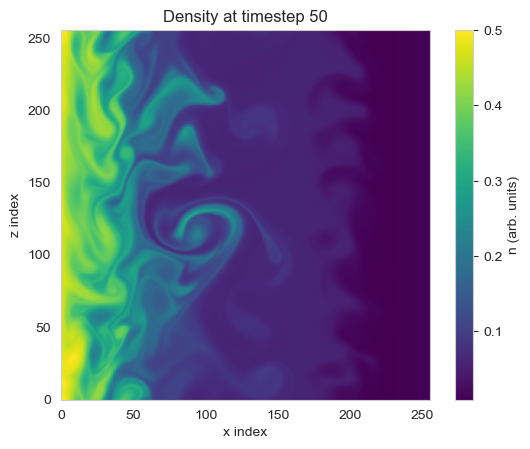

In [3]:
dens_array = np.array(dens_data)
valid_images = dens_array[23:,:,:]
dim = 256
scale_factors = (1, dim/dens_data.shape[1], dim/dens_data.shape[2])
images = zoom(valid_images, scale_factors, order=1)  # order=1 is bilinear

print(np.shape(images))

plt.figure()
plt.imshow(images[0,:,:].T, origin='lower', cmap='viridis')
plt.colorbar(label="n (arb. units)")
plt.xlabel("x index")
plt.ylabel("z index")
plt.title("Density at timestep 50")
plt.grid(False)
plt.show()


In [4]:
n = 256
im_list = []
for k in range(70):
    im = images[k,:,:]
    im_slices = [im[:,0:n],im[:,n:2*n],im[:,2*n:3*n],im[:,3*n:4*n]]
    for i in range(4):
        im_new = np.hstack([im_slices[-i],im_slices[1-i],im_slices[2-i],im_slices[3-i]])
        im_list.append(im_new)

im_data = np.array(im_list)
print(np.shape(im_data))






(280, 256, 256)


In [5]:


np.save("data_numpy/density256.npy", im_data.astype(np.float32))

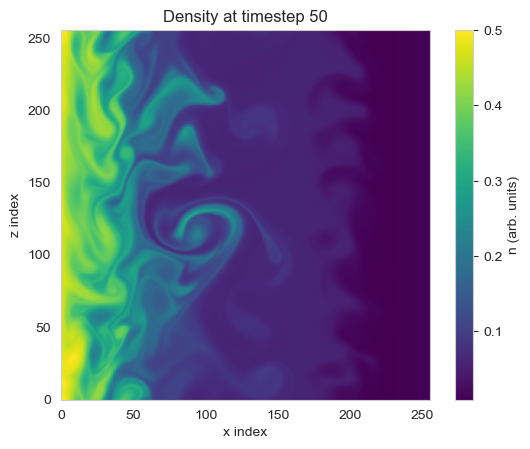

In [6]:
plt.figure()
plt.imshow(im_data[0,:,:].T, origin='lower', cmap='viridis')
plt.colorbar(label="n (arb. units)")
plt.xlabel("x index")
plt.ylabel("z index")
plt.title("Density at timestep 50")
plt.grid(False)
plt.show()
